### Grupo 4
### Miguel Egido Morales, Ana Robledano Abasolo, Alfredo Robledano Abasolo
# P3 AA Redes de Neuronas Convolucionales

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.14.0
169001437/169001437 [==============================] - 4s 0us/step


In [2]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [3]:
len(x_train)

50000

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2

model1 = Sequential()
#capa1:
model1.add(Conv2D(32, (3, 3), activation='relu',  padding='same',input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu',padding='same'))

model1.add(Flatten())
model1.add(Dense(250, activation='relu'))
model1.add(Dense(100, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 250)               8192250   
                                                                 
 dense_1 (Dense)             (None, 100)               25100     
                                                                 
Total params: 8227494 (31.39 MB)
Trainable params: 8227494 (31.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
history1 = model1.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/30
782/782 [==============================] - 17s 8ms/step - loss: 3.7899 - accuracy: 0.1317 - val_loss: 3.2728 - val_accuracy: 0.2172
Epoch 2/30
782/782 [==============================] - 6s 8ms/step - loss: 2.9797 - accuracy: 0.2715 - val_loss: 2.9374 - val_accuracy: 0.2777
Epoch 3/30
782/782 [==============================] - 6s 7ms/step - loss: 2.4862 - accuracy: 0.3690 - val_loss: 2.8433 - val_accuracy: 0.3083
Epoch 4/30
782/782 [==============================] - 6s 8ms/step - loss: 2.0259 - accuracy: 0.4688 - val_loss: 2.9022 - val_accuracy: 0.3113
Epoch 5/30
782/782 [==============================] - 6s 8ms/step - loss: 1.5855 - accuracy: 0.5727 - val_loss: 3.1301 - val_accuracy: 0.3031
Epoch 6/30
782/782 [==============================] - 6s 8ms/step - loss: 1.1778 - accuracy: 0.6736 - val_loss: 3.5301 - val_accuracy: 0.2891
Epoch 7/30
782/782 [==============================] - 7s 8ms/step - loss: 0.8368 - accuracy: 0.7658 - val_loss: 4.1162 - val_accuracy: 0.2881
Epoch

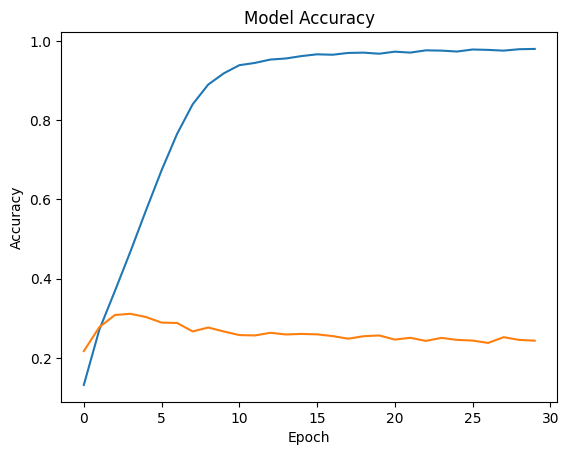

In [6]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])  # Agrega esta línea
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [7]:

model2 = Sequential()
#capa1:
model2.add(Conv2D(32, (3, 3), activation='relu',  padding='same',input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), padding='same' ,activation='relu'))

model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), padding='same' ,activation='relu'))
model2.add(Conv2D(64, (3, 3), padding='same' ,activation='relu'))

model2.add(Flatten())
model2.add(Dense(250, activation='relu'))
model2.add(Dense(100, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                      

In [8]:
history2 = model2.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/30
782/782 [==============================] - 9s 9ms/step - loss: 3.7105 - accuracy: 0.1390 - val_loss: 3.2291 - val_accuracy: 0.2172
Epoch 2/30
782/782 [==============================] - 6s 8ms/step - loss: 2.8571 - accuracy: 0.2898 - val_loss: 2.6838 - val_accuracy: 0.3290
Epoch 3/30
782/782 [==============================] - 7s 8ms/step - loss: 2.3497 - accuracy: 0.3946 - val_loss: 2.5786 - val_accuracy: 0.3581
Epoch 4/30
782/782 [==============================] - 6s 8ms/step - loss: 1.9535 - accuracy: 0.4844 - val_loss: 2.5395 - val_accuracy: 0.3754
Epoch 5/30
782/782 [==============================] - 7s 9ms/step - loss: 1.5547 - accuracy: 0.5748 - val_loss: 2.6282 - val_accuracy: 0.3746
Epoch 6/30
782/782 [==============================] - 6s 8ms/step - loss: 1.1484 - accuracy: 0.6744 - val_loss: 3.0004 - val_accuracy: 0.3669
Epoch 7/30
782/782 [==============================] - 7s 8ms/step - loss: 0.7682 - accuracy: 0.7752 - val_loss: 3.4930 - val_accuracy: 0.3503
Epoch 

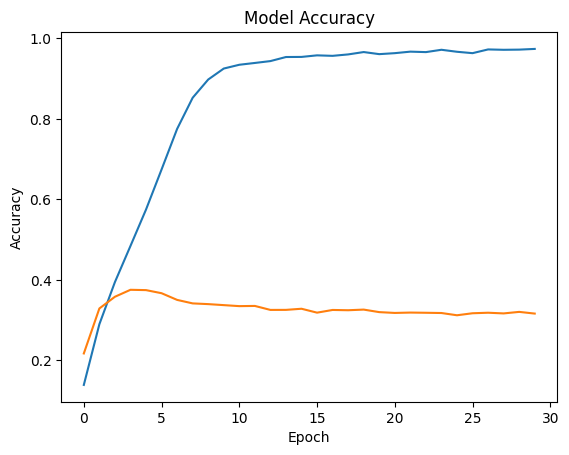

In [9]:
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])  # Agrega esta línea
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [10]:
#el siguiente es data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=64)

In [11]:
steps = int(x_train.shape[0] / 64)
history3 = model2.fit_generator(it_train, steps_per_epoch=steps, epochs=30, validation_data=(x_test, y_test), verbose=1)

Epoch 1/30


<ipython-input-11-5e4f57159a58>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model2.fit_generator(it_train, steps_per_epoch=steps, epochs=30, validation_data=(x_test, y_test), verbose=1)


781/781 [==============================] - 32s 41ms/step - loss: 2.8033 - accuracy: 0.3217 - val_loss: 2.5572 - val_accuracy: 0.3624
Epoch 2/30
781/781 [==============================] - 30s 39ms/step - loss: 2.3857 - accuracy: 0.3880 - val_loss: 2.5213 - val_accuracy: 0.3675
Epoch 3/30
781/781 [==============================] - 31s 40ms/step - loss: 2.2478 - accuracy: 0.4172 - val_loss: 2.4187 - val_accuracy: 0.3992
Epoch 4/30
781/781 [==============================] - 30s 39ms/step - loss: 2.1619 - accuracy: 0.4358 - val_loss: 2.3588 - val_accuracy: 0.3941
Epoch 5/30
781/781 [==============================] - 30s 38ms/step - loss: 2.0843 - accuracy: 0.4515 - val_loss: 2.2898 - val_accuracy: 0.4223
Epoch 6/30
781/781 [==============================] - 30s 38ms/step - loss: 2.0162 - accuracy: 0.4686 - val_loss: 2.2549 - val_accuracy: 0.4244
Epoch 7/30
781/781 [==============================] - 30s 38ms/step - loss: 1.9574 - accuracy: 0.4789 - val_loss: 2.3270 - val_accuracy: 0.4160
Epo

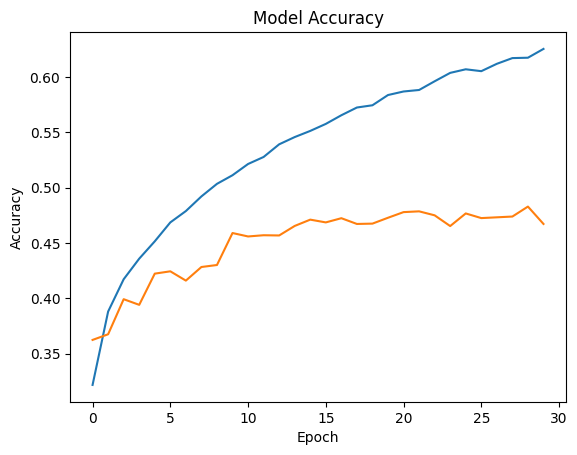

In [12]:
import matplotlib.pyplot as plt

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])  # Agrega esta línea
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()